# Proyecto de campaña de marketing para Banco


Algunos puntos a considerar:
- Objetivo: se quiere predecir si un cliente del Banco va a realizar un depósito a plazo o no -> Predicción
- Los datos están etiquetados, es decir, tenemos una muestra del comportamiento observado de algunos usuarios -> Aprendizaje Supervisado
- La variable a explicar (y : ¿Va a depositar a plazo?) es categórica (si/no) -> Problema de clasificación

### Paso 1 : Importación de datos desde página web

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [279]:
url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/'+\
    'main/bank-marketing-campaign-data.csv'
df=pd.read_csv(url,sep=';')

### Paso 2 : Análisis exploratorio de datos


Lo primero es ver cómo vienen los datos, para ello se imprime una muestra aleatoria de 10 observaciones y se analiza la información principal y descriptiva de la base.

In [280]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22284,44,technician,divorced,professional.course,unknown,yes,no,cellular,aug,thu,...,6,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
9076,42,blue-collar,divorced,high.school,no,no,yes,telephone,jun,thu,...,7,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
34242,29,admin.,single,high.school,no,no,no,cellular,may,thu,...,7,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
14815,23,blue-collar,single,high.school,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
26450,45,blue-collar,married,basic.9y,no,no,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
33686,44,admin.,married,high.school,no,yes,no,cellular,may,wed,...,3,999,2,failure,-1.8,92.893,-46.2,1.281,5099.1,no
15072,27,admin.,single,high.school,unknown,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
28908,35,services,single,high.school,no,yes,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
11851,53,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,jun,fri,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
5670,54,retired,married,basic.9y,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Se observa que el dataset cuenta con 41.188 observaciones y 21 variables. A su vez, no existen valores nulos en el dataset. Con respecto al tipo de dato, se observa que las variables que están como 'objeto' deberían ser 'category'.

In [282]:
obj=df.select_dtypes('object').columns

In [283]:
df[obj]=df[obj].astype('category')

**Variables cualitativas**

In [284]:
df.describe(include='category')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Del resumen anterior se observa la cantidad de clases que tiene cada variable, la clase que predomina y su frecuencia. Así se puede decir que los clientes que trabajan como administradores, están casados, tienen un grado universitario, no son impagos (default), tienen préstamos hipotecarios pero no tienen personales y fueron contactados un miércoles de mayo, tienen mayor probabilidad de no tener un depósito a plazo.

Se explora las categorías de cada variables para luego transformarlas en caso de que sea necesario.

In [285]:
for i in df.select_dtypes('category'):
    print('')
    print('Categorias de ',i)
    print('')
    print(df[i].value_counts(normalize=True))


Categorias de  job

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

Categorias de  marital

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

Categorias de  education

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

Categorias de  default

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

Categorias de  housing

yes        0.523842
no         0.452122
unknown

Se observa que algunas variables continene categorías 'unknow' que no aportan información y se pueden interpretar como valores faltantes. En el paso siguiente se dará un tratamiento a éstas categorías de manera de que las observaciones se puedan utilizar.

Con respecto a la variable objetivo 'y' se observa que un 89% de la muestra refiere a clientes que no han realizado un depósito a plazo, mientras que un 11% si lo han hecho.

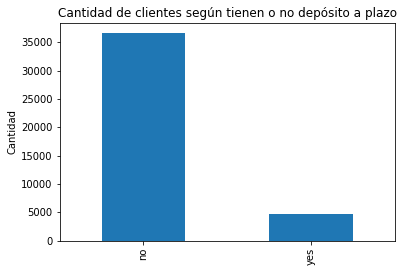

In [286]:
df['y'].value_counts().plot(kind='bar',title='Cantidad de clientes según tienen o no depósito a plazo',ylabel='Cantidad')
plt.show()

Al momento de seleccionar la muestra para entrenar el modelo se debe considerar que la muestra original se encuentra desbalanceada para que no genere un sesgo hacia el 'no' simplemente porque prepondera en los datos utilizados. 

**Variables cuantitativas**

In [287]:
round(df.describe(include=['int','float64']),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [288]:
round(sum(df['pdays']==999)/len(df)*100)

96

Lo primero que se observa es que la variable pdays tiene un valor 999 que refiere a clientes que no fueron contactados en campañas anteriores. Si bien el 96% de la muestra nunca fue contactada, al ser una variable numérica, el modelo lo va a interpretar como contactos realizados hace 999 días. Para que no genere problemas en el modelado se decide darle un tratamiento, transformandola en una variable binaria indicando si fue contactado o no en campañas anteriores.

In [289]:
df['pdays']=['no' if i==999 else 'yes' for i in df['pdays']]
df['pdays'].value_counts()

no     39673
yes     1515
Name: pdays, dtype: int64

A simple vista se observa que en algunas variables distan mucho el 1er cuartil del minimo y/o el 3er cuartil del valor máximo, lo que llama la atención. A continuación se observa cuántas casos existen de este tipo.

In [290]:
dic_min={}
dic_max={}

for i in df.select_dtypes(['float64','int']):
    q3, q1 = np.percentile(df[i], [75,25])
    IQR=q3-q1
    dic_min[i]=q1-IQR*1.5
    dic_max[i]=q3+IQR*1.5
    print('Variable ',i)
    print('Existen', sum(df[i]<q1-IQR*1.5), 'posibles outliers en la cola izquierda') 
    print('Existen', sum(df[i]>q3+IQR*1.5), 'posibles outliers en la cola derecha')

Variable  age
Existen 0 posibles outliers en la cola izquierda
Existen 469 posibles outliers en la cola derecha
Variable  duration
Existen 0 posibles outliers en la cola izquierda
Existen 2963 posibles outliers en la cola derecha
Variable  campaign
Existen 0 posibles outliers en la cola izquierda
Existen 2406 posibles outliers en la cola derecha
Variable  previous
Existen 0 posibles outliers en la cola izquierda
Existen 5625 posibles outliers en la cola derecha
Variable  emp.var.rate
Existen 0 posibles outliers en la cola izquierda
Existen 0 posibles outliers en la cola derecha
Variable  cons.price.idx
Existen 0 posibles outliers en la cola izquierda
Existen 0 posibles outliers en la cola derecha
Variable  cons.conf.idx
Existen 0 posibles outliers en la cola izquierda
Existen 447 posibles outliers en la cola derecha
Variable  euribor3m
Existen 0 posibles outliers en la cola izquierda
Existen 0 posibles outliers en la cola derecha
Variable  nr.employed
Existen 0 posibles outliers en la 

Las variables que tienen posibles outliers son age, duration, campaign, previous y cons.conf.idx.

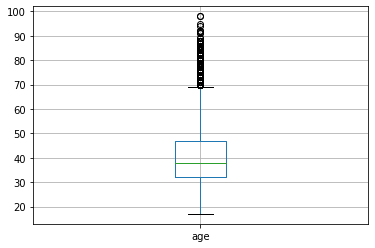

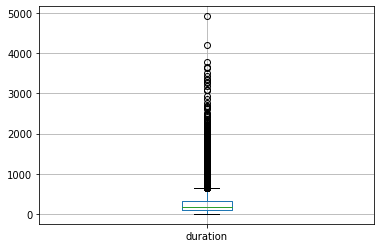

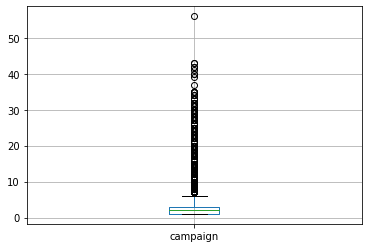

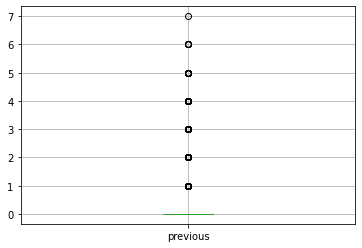

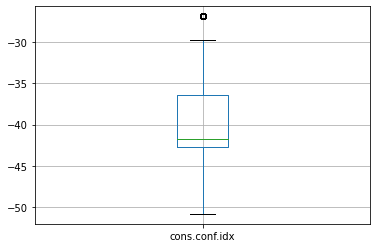

In [291]:
for i in ['age','duration','campaign','previous','cons.conf.idx']:
    df[[i]].boxplot()
    plt.show()

La variable previous no parece tener una distribución normal (es discreta), por lo que no se puede utilizar este criterio para detectar outliers. Por otro lado, se decide no eliminar observaciones según la variable age ya que el comportamiento de la variable seguramente se deba a un tema generacional, no a un error en la muestra. Lo que se podría hacer en este caso es considerar distintos rangos etareos para la predicción ya que cada uno se comportará distinto.

In [292]:
for i in ['duration','campaign','cons.conf.idx']:
    df=df[(df[i]> dic_min[i]) & (df[i]<dic_max[i])]
    df.reset_index(inplace=True,drop=True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34643 entries, 0 to 34642
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             34643 non-null  int64   
 1   job             34643 non-null  category
 2   marital         34643 non-null  category
 3   education       34643 non-null  category
 4   default         34643 non-null  category
 5   housing         34643 non-null  category
 6   loan            34643 non-null  category
 7   contact         34643 non-null  category
 8   month           34643 non-null  category
 9   day_of_week     34643 non-null  category
 10  duration        34643 non-null  int64   
 11  campaign        34643 non-null  int64   
 12  pdays           34643 non-null  object  
 13  previous        34643 non-null  int64   
 14  poutcome        34643 non-null  category
 15  emp.var.rate    34643 non-null  float64 
 16  cons.price.idx  34643 non-null  float64 
 17  cons.conf.id


A continuación se observa si existen lineas repetidas en el dataset.

In [294]:
print('Existen ', df.duplicated().sum(),'registros repetidos, se eliminan de la base de datos para que no interfieran en la predicción. Finalmente el dataset contiene ', len(df.drop_duplicates()),' registros únicos.')

df=df.drop_duplicates()

Existen  11 registros repetidos, se eliminan de la base de datos para que no interfieran en la predicción. Finalmente el dataset contiene  34632  registros únicos.


### Paso 3 : Preprocesamiento de la base de datos

**Variables cualitativas**

Del análisis anterior se detectó que existen algunas categorías 'unknown' las cuales se deben imputar antes de realizar el modelo de clasificación. A continuación se seleccionan las variables que tienen ésta categoría y luego se sustituye por la moda. 

In [ ]:
uk=[]
for i in df:
    [uk.append(i) for n in df[i].unique() if n=='unknown']

print(uk)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [295]:
for i in uk:
    df=df.replace({i:'unknown'}, df[i].mode()[0]) 

# Control
#uk=[]
#for i in df:
 #   [uk.append(i) for n in df[i].unique() if n=='unknown']

#print(uk)

In [296]:
df.describe(include='category')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,34632,34632,34632,34632,34632,34632,34632,34632,34632,34632,34632
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,9021,21062,11663,34629,19041,29393,22096,11861,7302,29749,31765


Luego de asignarle la moda a las categorias 'unknown', se observa que la cantidad de categorías disminuye en una pero el valor más frecuente ('top') se mantiene, como era de esperar.

A continuación se sustituyen las categorías 'basic.9y','basic.6y','basic4y' de la variable education a 'middle_school'.

In [297]:
df=df.replace({'education':['basic.9y','basic.6y','basic.4y']}, 'middle_school')
df['education'].value_counts()

university.degree      11663
middle_school          10550
high.school             7984
professional.course     4420
illiterate                15
Name: education, dtype: int64

Se divide en rangos la variable 'age' en linea a lo planteado con anterioridad.

In [305]:
df['age_rang']=pd.cut(df['age'],bins=[10,20,30,40,50,60,70,80,90,100])
df['age_rang']=df['age_rang'].astype('category')

In [307]:
df['age_rang'].value_counts()

(30, 40]     13860
(40, 50]      8595
(20, 30]      6064
(50, 60]      5252
(60, 70]       406
(70, 80]       236
(10, 20]       129
(80, 90]        84
(90, 100]        6
Name: age_rang, dtype: int64

Por último, se deben transformar a código las categorías para ser utilizadas en el modelo.

In [308]:
df_cod=df.copy()
for i in df.select_dtypes('category'):
    df_cod[i]=df[i].cat.codes

In [312]:
df_cod.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_rang
0,56,3,1,0,0,0,0,1,6,1,...,no,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
1,57,7,1,1,0,0,0,1,6,1,...,no,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
2,37,7,1,1,0,1,0,1,6,1,...,no,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
3,40,0,1,0,0,0,0,1,6,1,...,no,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
4,56,7,1,1,0,0,1,1,6,1,...,no,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4


Step 4

In [ ]:
X=df.drop(columns=['y'])

In [ ]:
y=df['y']

In [ ]:
X.select_dtypes(include=['int','float64']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
#scikit learn logistic regression